# Case study - improving a visual

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd

<font color=blue size=4>
    Description of situation:
</font>

><font size='3'>For a presentation, you want to create a visualisation that shows that the canton of Geneva has the highest **relative** population growth since 1850 of all the cantons in Switzerland. Your colleague has created a first version of such a visualization using the code below:</font>


In [ ]:
# Read data
df = pd.read_csv('swiss_population.csv', index_col='canton')

# Get unique cantons
cantons = df.index.unique()

# Exclude canton Jura (as it did not yet exist in 1850)
cantons = cantons.drop('Jura')

cantons

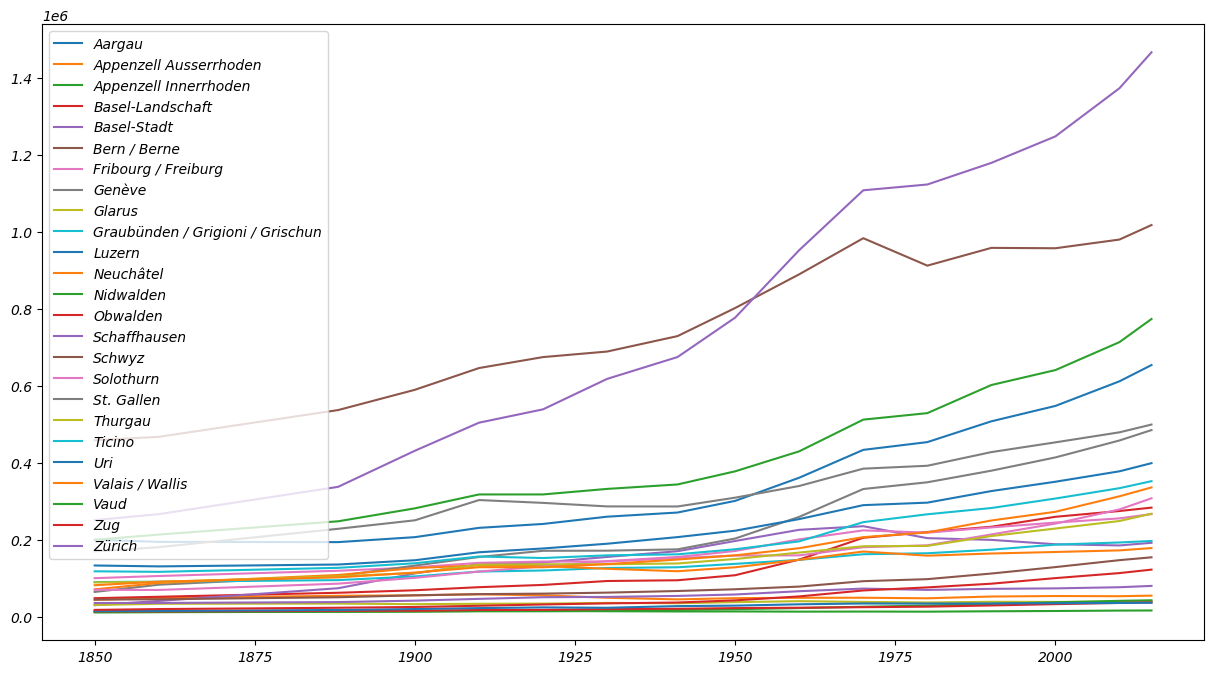

In [ ]:
# Create Figure and Axes objects
fig, ax = plt.subplots(figsize=(15, 8))

# Add a line for each canton
for canton in cantons:
    ax.plot(df.loc[canton, 'year'], df.loc[canton, 'population'], label=canton)

# Add a legend
ax.legend()

# Save figure as pdf
fig.savefig('before.pdf')

In [ ]:
idx = df['year'] == 2015
df.loc[idx, :].sort_values(by='population')

,year,population
canton,,
Appenzell Innerrhoden,2015,15974.0
Uri,2015,35973.0
Obwalden,2015,37076.0
Glarus,2015,40028.0
Nidwalden,2015,42420.0
Appenzell Ausserrhoden,2015,54543.0
Jura,2015,72782.0
Schaffhausen,2015,79836.0
Zug,2015,122134.0


<font color=blue size=4>
    Tasks:
</font>

><font size='3'>
    a) Mention what would you do not like about your colleague's visualization<br>
    b) Create an improved visualization
</font>


<font color=blue size=4>
    Solution task a):
</font>

* The message is unclear (see rule 2)
* The visualization is too complicated for a presentation (see rule 3)
* There are no captions except the legend which is not very helpful (see rue 4)
* The plot uses default settings and is thus not fine tuned (see rule 5)
* Color is not used effectively (see rule 6)
* The plot shows the absolute population growth which might be misleading to the audience (see rule 7)
* The plot has a relatively low data-ink ratio (see rule 8)
* The plot is neither beautiful nor informative (see rule 9)

<font color=blue size=4>
    Solution task b):
</font>

1) Preprocess raw data

In [ ]:
# Add a column to the dataframe which contains the relative population growth
df
df['growth'] = 0.0

# Compute the relative population growth as percentage values for each canton
for canton in cantons:
    absolute_population_counts = df.loc[canton, 'population']
    initial_population_count = df.loc[canton, 'population'].values[0]
    df.loc[canton, 'growth'] = (absolute_population_counts / initial_population_count - 1) * 100

In [ ]:
# Create a series that captures total relative growth in 2015
total_reative_growth = pd.Series(index=cantons, dtype=float)


In [ ]:
# Fill series with growth values
for canton in cantons:
    total_reative_growth[canton] = df.loc[canton, 'growth'].values[-1]

In [ ]:
# Sort series in ascending order
sorted_cantons = total_reative_growth.sort_values()
sorted_cantons

2) Generate visualization step-by-step

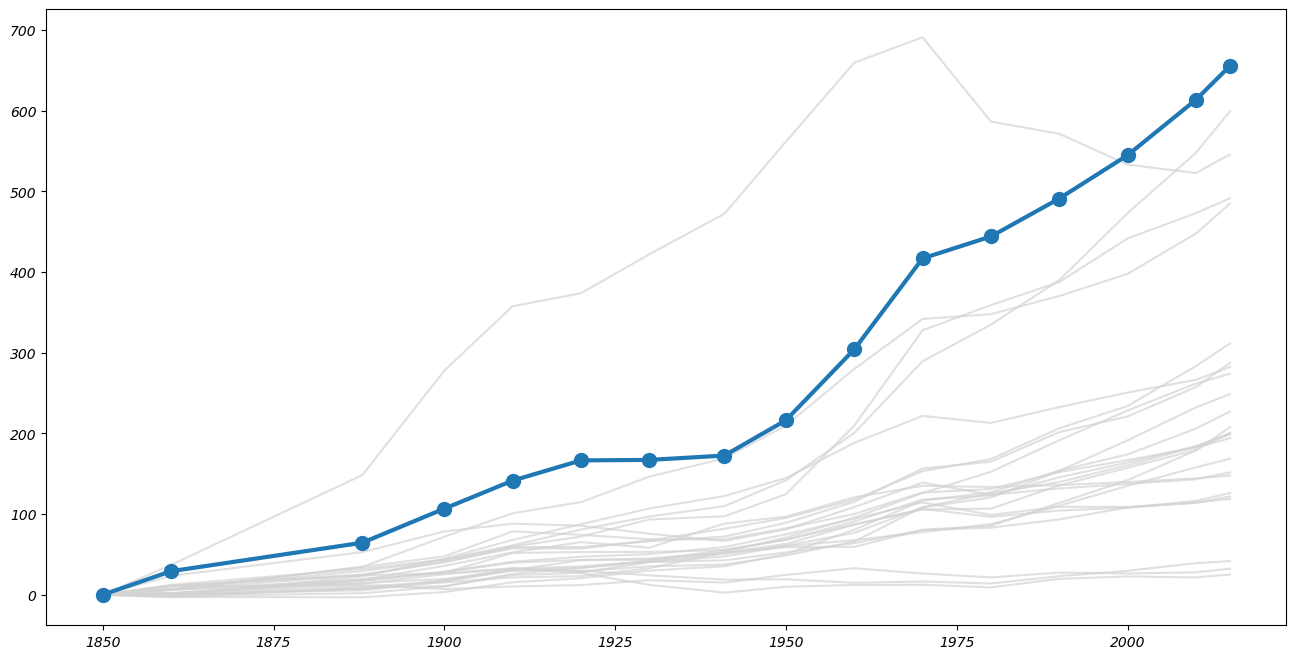

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# Add a lightgray line for each canton
lines = {}
for canton in sorted_cantons.index:
    lines[canton], = ax.plot(df.loc[canton, 'year'], df.loc[canton, 'growth'], color='lightgray', alpha=0.7)

# Change properties of the Genève line
lines['Genève'].set(color='tab:blue', marker='o', markersize=10, linewidth=3, alpha=1);

# question: why does the blue line has dots?

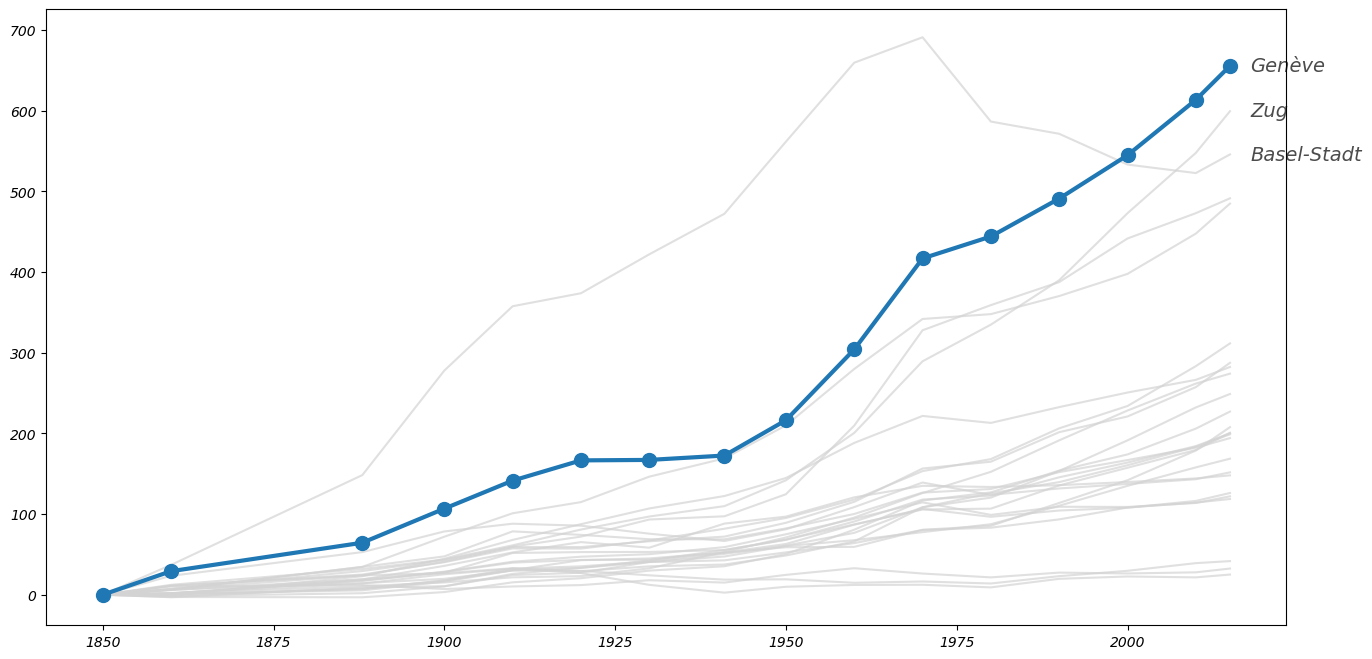

In [ ]:
# Annotate top three lines
for canton in sorted_cantons.index[-3:]: # loop the first three cantons
    ax.annotate(text=canton, xy=(2015 + 3, df.loc[canton, 'growth'].values[-1]),
                ha='left', va='center', fontsize=14, alpha=0.7)

fig

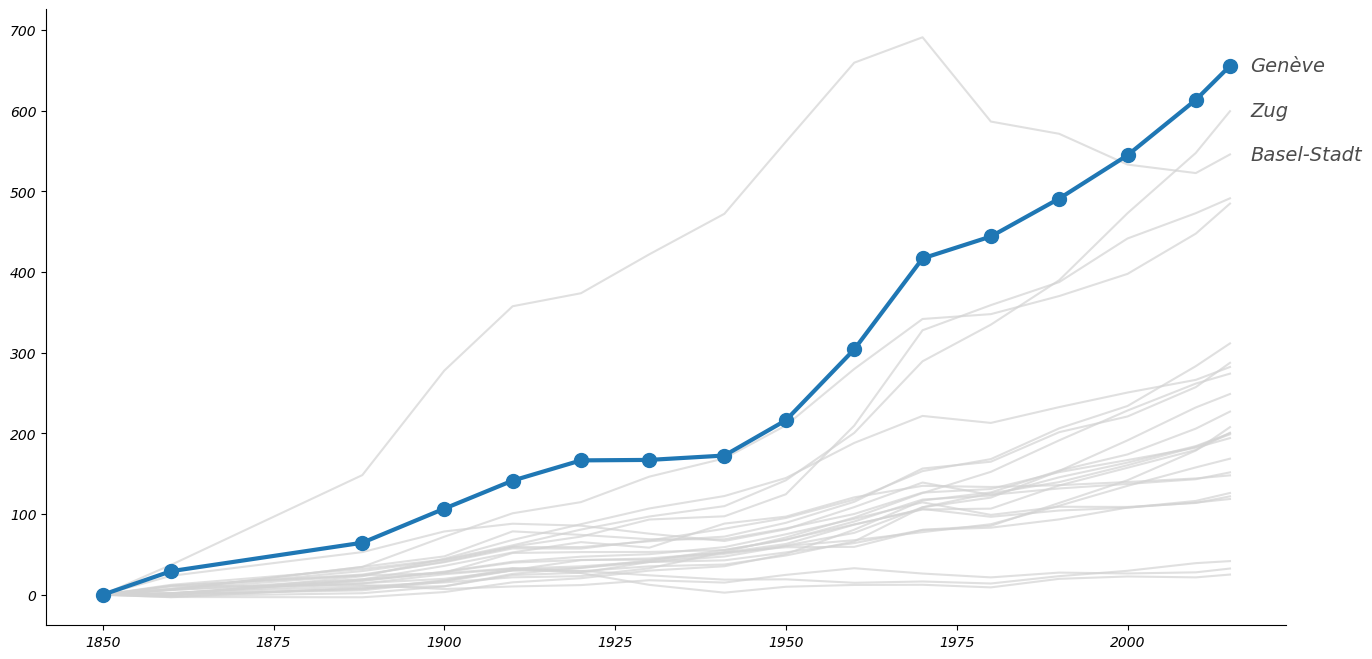

In [ ]:
# Remove top and left spine
ax.spines[['top', 'right']].set_visible(False)

fig

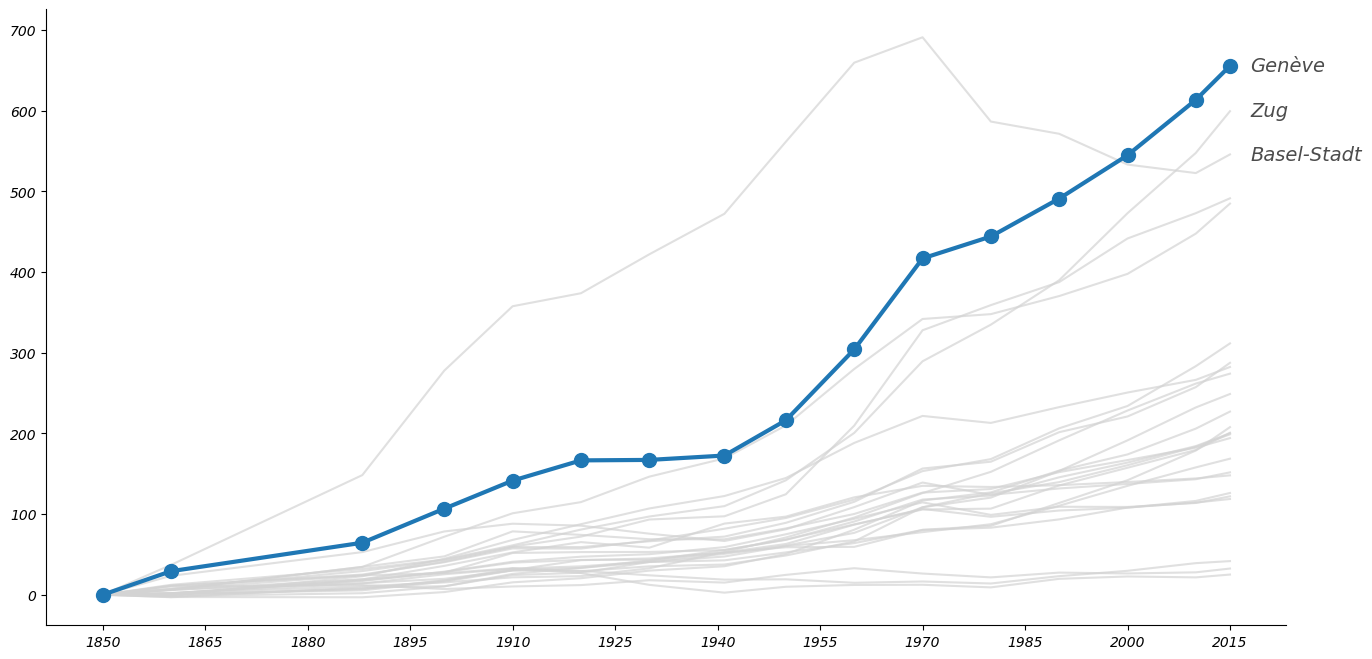

In [ ]:
# Adjust xticks (what would be if we can not divide it by 15? you can hardcode it. You can also use np.arange or np.linspace)
xtick_locations = range(1850, 2030, 15)
xtick_labels = range(1850, 2030, 15)
ax.set_xticks(xtick_locations, xtick_labels)

fig

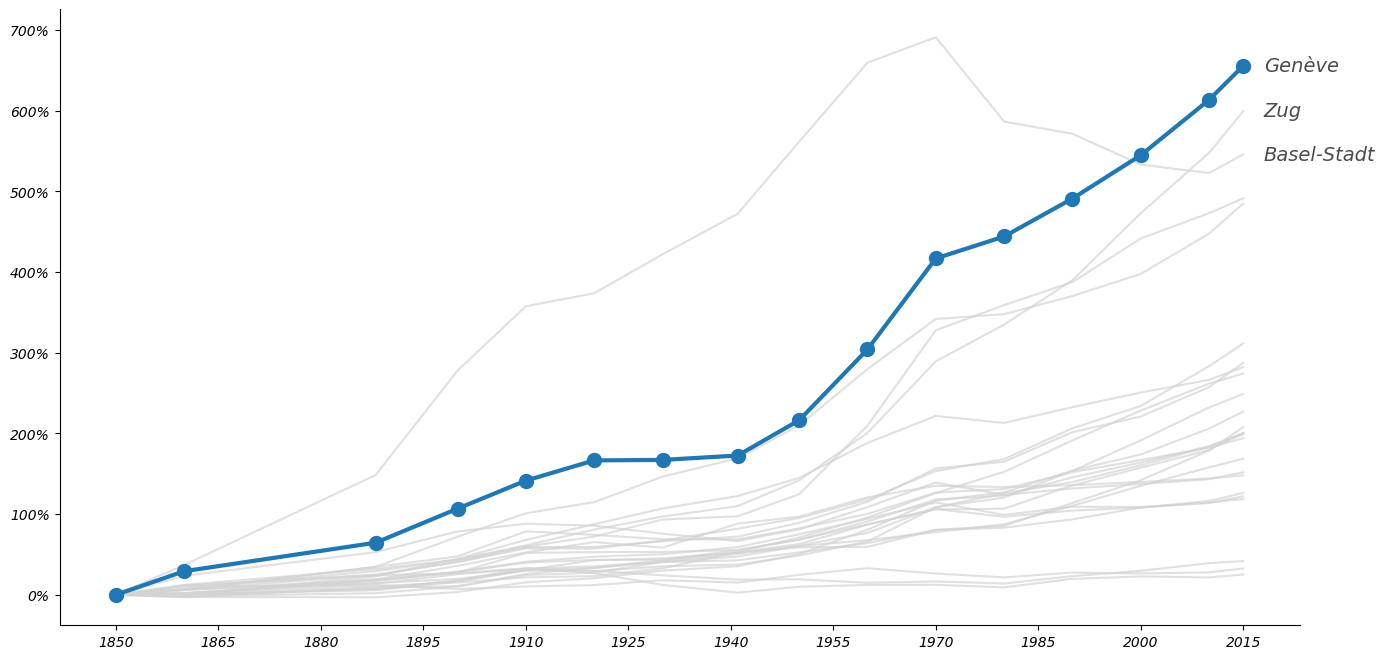

In [ ]:
# Adjust ytick labels
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

fig

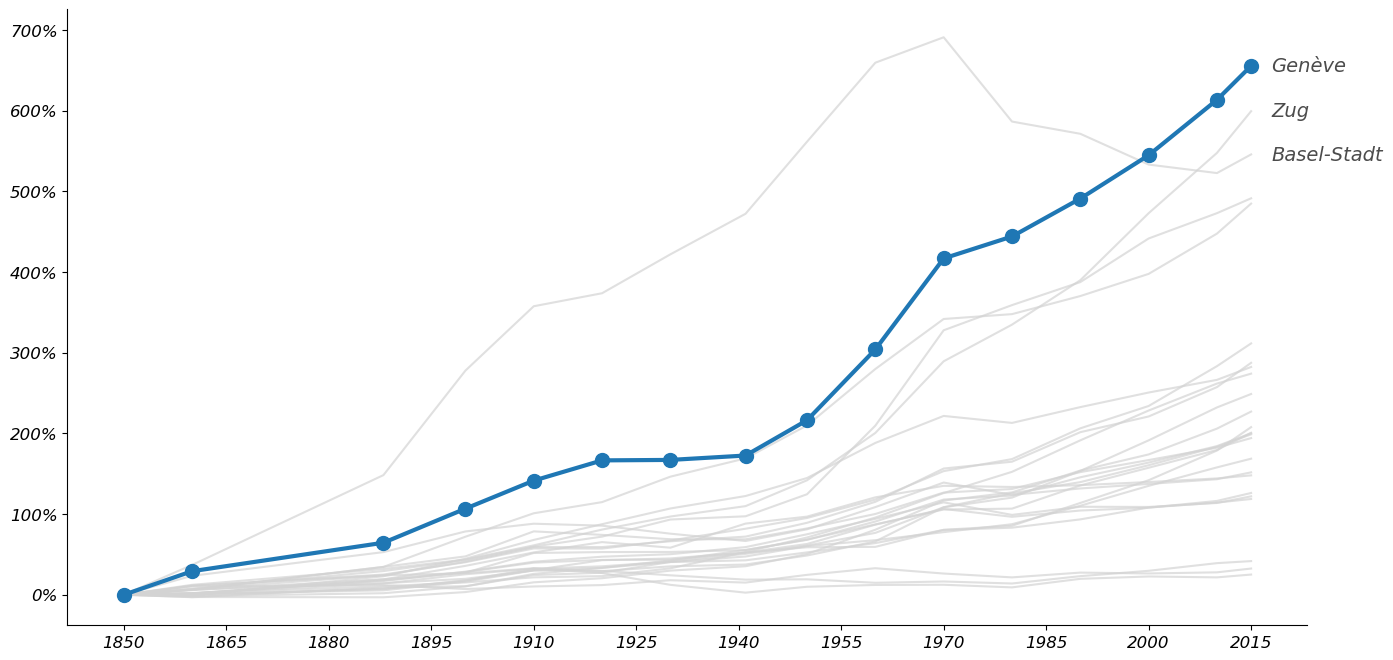

In [ ]:
# Adjust font size of tick labels
ax.tick_params(labelsize=12)

fig

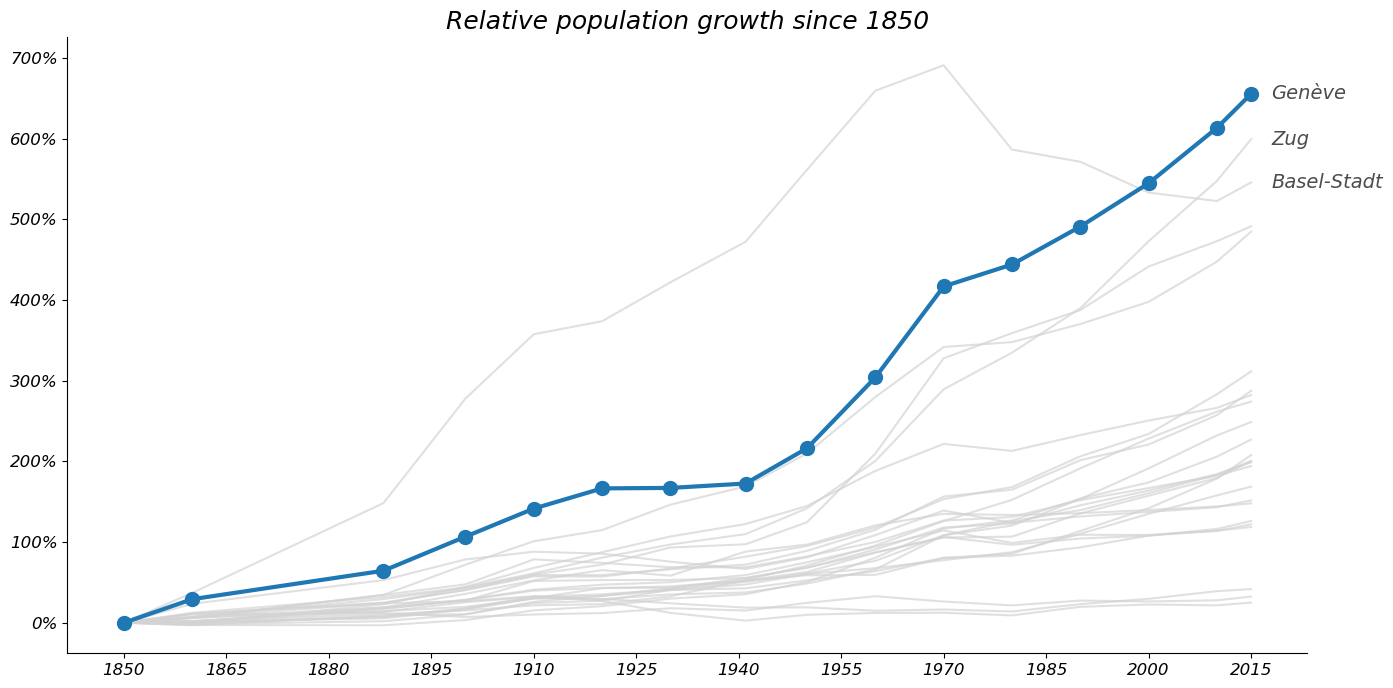

In [ ]:
# Set title
ax.set_title('Relative population growth since 1850', fontsize=18)

fig

In [ ]:
# Save figure as pdf
fig.savefig('after.pdf')